# Figures with phylogeny

Loading modules

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

Loading data

In [3]:
# Result of masking genomes with de novo + eukaryotic RepBase database
total = pd.read_csv("../ipython_data/total_repeats.dataframe", sep = "\t", index_col = False, na_values='na',
                       names = ["ALIAS", "NAME", "CLASS", "FAM", "CLASS_FAM", "FULL", 
                                "LENGTH", "FRG", "FULL_FRG", "NR_FRG", "AVG_DIV",
                                "MED_DIV", "AVG_DEL", "MED_DEL", "AVG_INS", "MED_INS",
                                "LEN_MASKED", "AVG_LEN_MASKED", "MED_LEN_MASKED", "GENOME_PERC",
                                "LEN_OVERLAP", "GENOME_PERC_OVERLAP", "LEN_MASKED_OVERLAP"])
annot = pd.read_csv("../ipython_data/names.tab", encoding = "UTF-8", sep = "\t",\
                    names = ["ALIAS", "ORDER", "SPECIES", "COMMON_NAME"])
stats = pd.read_csv("../ipython_data/N50.tab", sep = " ",\
                    names = ["ALIAS", "N50", "ASSEMBLY_SIZE", "A%", "G%", "C%", "T%"]).drop_duplicates()
annotstats = pd.merge(annot, stats) # Additional info combined

alias74 = pd.read_table('../ipython_data/74aliases', header = None, names = ['ALIAS'])
df1 = pd.merge(total, annotstats)
df2 = pd.merge(alias74, df1) # Final frame

# Tree with simple (tandem) repeats and TE content

In [69]:
from ete3 import Tree, faces, TreeStyle, TextFace, NodeStyle, CircleFace

def make_a_tree(tree, order, filename):
    # Importing full phylogeny
    t = Tree(tree)
    

    fish_94 = t.search_nodes(name="fish_94")[0]
    fish_94.delete()
    fish_107 = t.search_nodes(name="fish_107")[0]
    fish_107.delete()
    
    # For every node label, get the names
    fish = []
    for node in t.traverse():
        if 'fish' in node.name:
            fish.append(node.name)
    

    # Create the layout
    def mylayout(node): 
        if node.is_leaf():
            for i in fish:
                if node.search_nodes(name = i):

    
                    if i in set(df2.ALIAS): 
                        # Adding 'SPECIES' to circle
                        faces.add_face_to_node(faces.TextFace('%s' \
                        % df2[df2['ALIAS']==i].SPECIES.unique()[0], 
                        fsize = 12,fstyle = 'italic'), node, column=0)
                    
                        # Showing TR content 
                        TR = CircleFace(radius=np.log(df2[(df2['ALIAS']==i) &
                             (df2['CLASS']=='Simple_repeat')].groupby('ALIAS').sum().GENOME_PERC[0]) * 2, 
                             color="RoyalBlue", style="circle")

                        # Let's make the sphere transparent
                        TR.opacity = 0.9
                        # And place as a float face over the tree
                        faces.add_face_to_node(TR, node, column = 1, aligned = True)
                        
                        # Showing TE content
                        TE = CircleFace(radius=np.log(df2[(df2['ALIAS']==i) &
                             (df2['CLASS'].isin(['DNA', 'LTR', 'SINE', 'Unknown']))].groupby('ALIAS').sum().GENOME_PERC[0]) *2, 
                             color="FireBrick", style="circle")

                        # Let's make the sphere transparent
                        TE.opacity = 0.9
                        # And place as a float face over the tree
                        faces.add_face_to_node(TE, node, column = 2, aligned = True)
                        


    for n in t.traverse():
        nstyle = NodeStyle()
        nstyle["fgcolor"] = "White"
        nstyle["size"] = 0.1
        n.set_style(nstyle)
    
    # Coloring Acanthomorphata
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Polymixia japonica') |
                                           (df2['SPECIES']=='Gadus morhua')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Bisque'
    nstyle['bgcolor'] = 'Seashell'
    n.set_style(nstyle)

    # Coloring Gadiformes
    n = t.get_common_ancestor(set(df2[df2['ORDER']=='Gadiformes'].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'BlanchedAlmond'
    nstyle['bgcolor'] = 'WhiteSmoke'
    n.set_style(nstyle)
    
    
    # Coloring Acanthopterygii
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Monocentris japonica') |
                                           (df2['SPECIES']=='Xiphophorus maculatus')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Plum'
    nstyle['bgcolor'] = 'Ivory'
    n.set_style(nstyle)

    # Coloring Percomorphaceae
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Chatrabus melanurus') |
                                           (df2['SPECIES']=='Xiphophorus maculatus')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Thistle'
    nstyle['bgcolor'] = 'Snow'
    n.set_style(nstyle)
    
    # Coloring Lampridacea
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Regalecus glesne') |
                                           (df2['SPECIES']=='Lampris guttauts')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Khaki'
    nstyle['bgcolor'] = 'Snow'
    n.set_style(nstyle)
    
    # Coloring the rest
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Benthosema glaciale') |
                                           (df2['SPECIES']=='Danio rerio')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'LavenderBlush'
    
    nstyle['bgcolor'] = 'Linen'

    n.set_style(nstyle)
    
    # Display the tree
    ts = TreeStyle()
    ts.show_leaf_name = False
    ts.show_branch_length = False
    ts.show_scale = False
    ts.layout_fn = mylayout
    ts.mode = 'c'
    #ts.tree_width = 2000 
    t.render(filename, tree_style = ts)
    return "Done"

make_a_tree('../phylogeny/final_tree.tre', '', '../figures/%s_tree.pdf' % '3.may_test_circle_barplot')

'Done'

# Heatmap-tree

In [11]:
a = df2[df2['FAM'].isin(inc)].dropna().groupby(by=['FAM', 'SPECIES']).sum()[['GENOME_PERC']].reset_index()
frame = a.dropna().groupby(by=['FAM', 'SPECIES']).sum()

Frame for heatmap

In [38]:
frame.head()

GENOME_PERC
FAM       SPECIES                              
CMC-EnSpm Acanthochaenus luetkenii     0.161978
          Anabas testudineus           0.042760
          Antennarius striatus         0.079826
          Arctogadus glacialis         0.217231
          Astyanax mexicanus           0.079107

# List of top 30 TE family names

In [32]:
a = df2[df2['CLASS'].isin(['DNA', 'LTR', 'LINE', 'SINE'])]
a = a[~a['FAM'].isin(['Unknown', 'DNA', 'LTR', 'LINE', 'SINE', 'hAT?'])]
a.groupby(['FAM']).sum()[['GENOME_PERC']].sort_values(by='GENOME_PERC').tail(30).reset_index().FAM.values

array(['RTE-X', 'Kolobok-Hydra', 'PIF-ISL2EU', 'TcMar-Tc2', 'R2-Hero',
       'RTE', 'Copia', 'ERVK', 'Kolobok-T2', 'hAT', 'Maverick', 'DIRS',
       'L1-Tx1', 'hAT-Tip100', 'Ginger', 'Pao', 'Penelope', 'Novosib',
       'Sola', 'ERV1', 'PIF-Harbinger', 'L1', 'hAT-Charlie', 'CMC-EnSpm',
       'hAT-Ac', 'RTE-BovB', 'Rex-Babar', 'Gypsy', 'TcMar-Tc1', 'L2'], dtype=object)

In [8]:
# The 30 most prevalent TEs based on genome coverage
inc = ['RTE-X', 'Kolobok-Hydra', 'PIF-ISL2EU', 'TcMar-Tc2', 'R2-Hero',
       'RTE', 'Copia', 'ERVK', 'Kolobok-T2', 'hAT', 'Maverick', 'DIRS',
       'L1-Tx1', 'hAT-Tip100', 'Ginger', 'Pao', 'Penelope', 'Novosib',
       'Sola', 'ERV1', 'PIF-Harbinger', 'L1', 'hAT-Charlie', 'CMC-EnSpm',
       'hAT-Ac', 'RTE-BovB', 'Rex-Babar', 'Gypsy', 'TcMar-Tc1', 'L2']

In [37]:
def heatmapper(df, title):    
    
    # Only include families above (the 30 most dominant TEs across all the fish)

    frame = df[df['FAM'].isin(inc)].dropna().groupby(by=['FAM', 'SPECIES']).sum() # Frame manipulation

    # Make it work with seaborn
    def df_for_seaborn(df):
        lst = []
        for row in df[['GENOME_PERC']].itertuples():
            lst2 = []
            lst2.append(row[0][0])
            lst2.append(row[0][1])
            lst2.append(row [1])
            lst.append(lst2)
        return lst

    heatmapdf = pd.DataFrame(data = df_for_seaborn(frame))
    
    addthis = pd.DataFrame(inc)
    addthis[1] = df['SPECIES'].values[0]
    addthis[2] = 0
    
    frames = [addthis, heatmapdf]
    heatmapdf = pd.concat(frames) 
    
    
    heatmapdf = heatmapdf.pivot_table(index = 0, columns = 1, values = 2)
    
    with sns.axes_style('white'):
        return sns.heatmap(heatmapdf, cbar = False, xticklabels = False,
                       yticklabels = False, linecolor = 'Black', vmax = 1, mask=(heatmapdf==0))

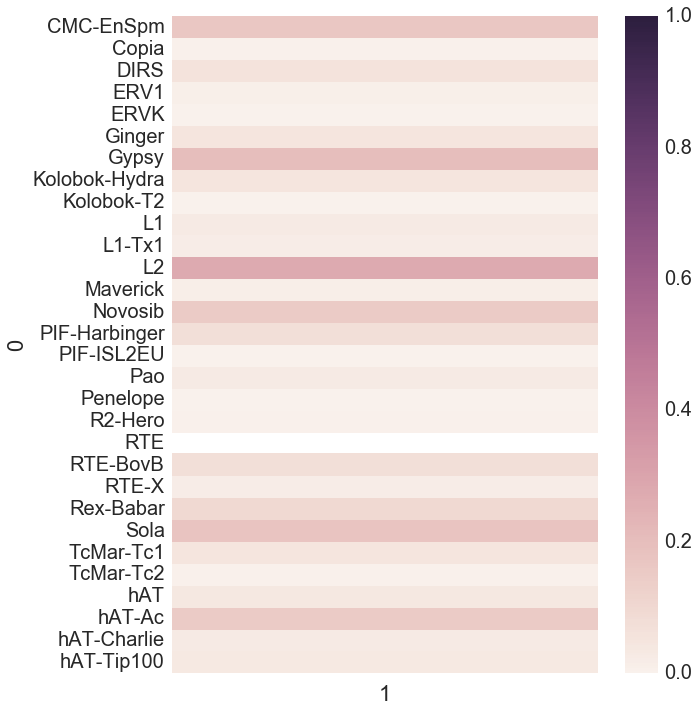

In [20]:
# Need the y axis labels and the scale for the figure

sns.set(font_scale=2) 

fish = df2[df2['ALIAS']=='fish_97']
plt.figure(figsize=(10,10))
heatmapper(fish, 'All repeats')

plt.tight_layout()
plt.savefig('../figures/heatmaps/legend_superfams.pdf', format='pdf', transparent = True)

## Set 'yticklabels = False' and 'cbar = False' in the 'heatmapper' function

A heatmap is produces for each fish, named by the 'ALIAS'. They will be added to the phylogenetic tree later.

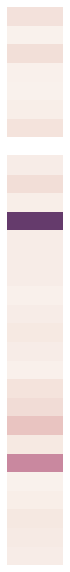

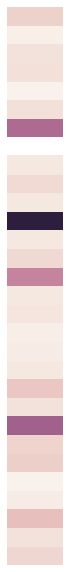

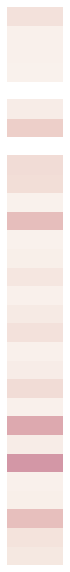

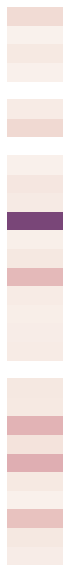

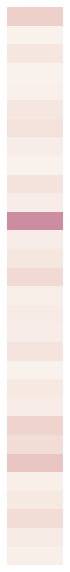

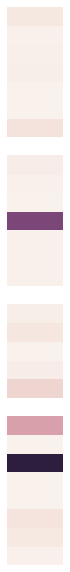

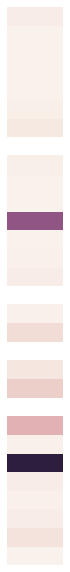

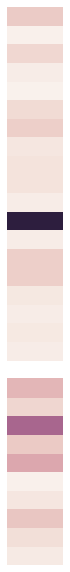

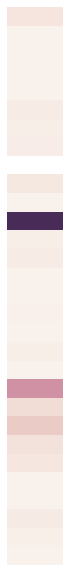

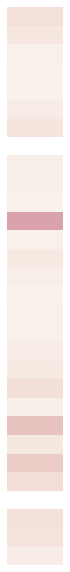

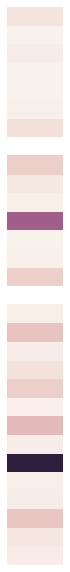

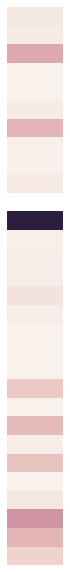

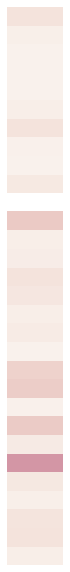

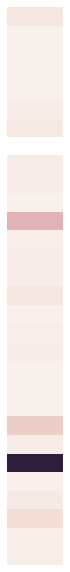

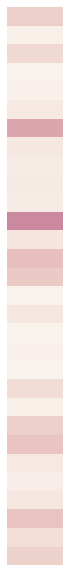

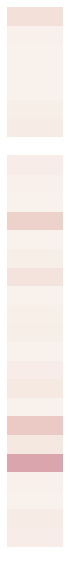

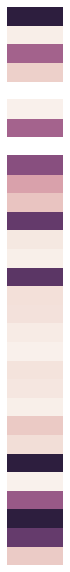

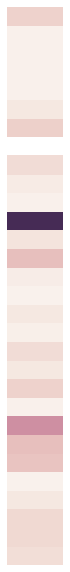

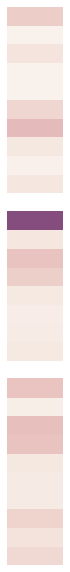

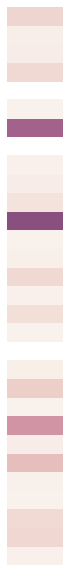

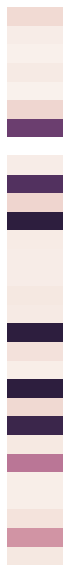

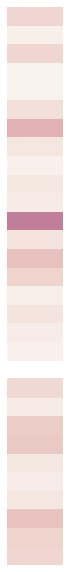

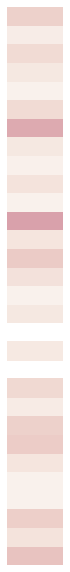

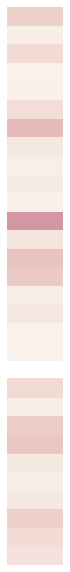

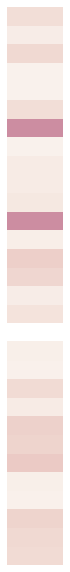

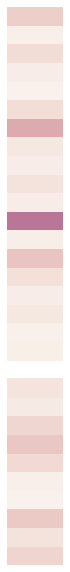

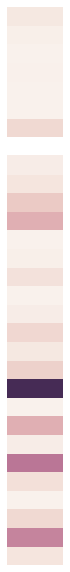

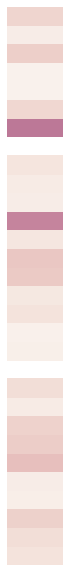

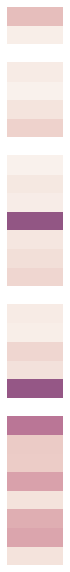

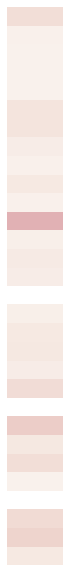

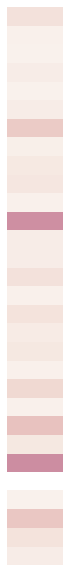

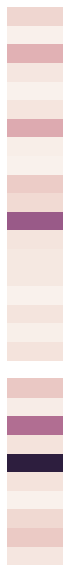

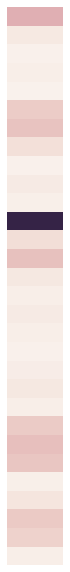

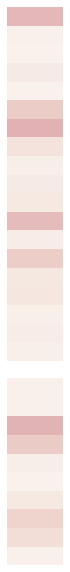

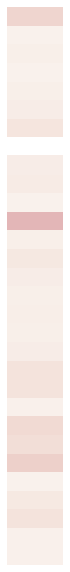

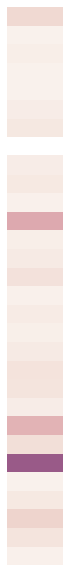

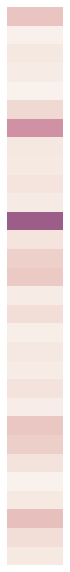

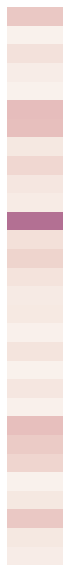

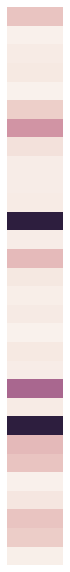

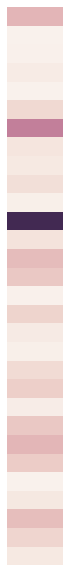

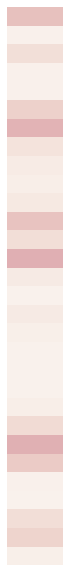

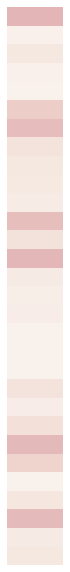

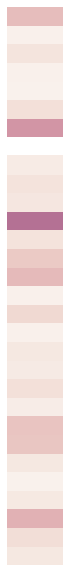

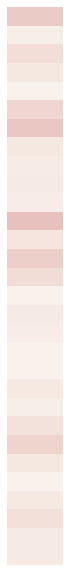

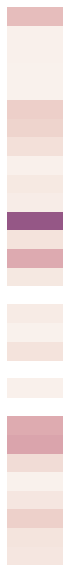

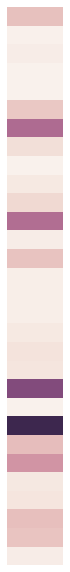

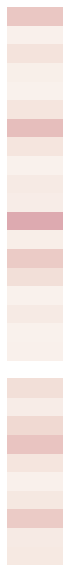

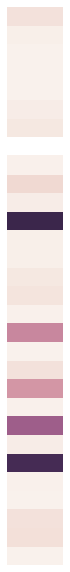

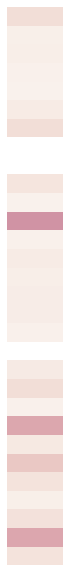

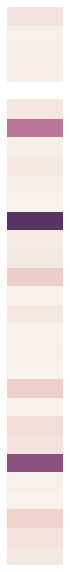

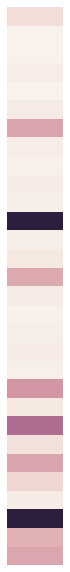

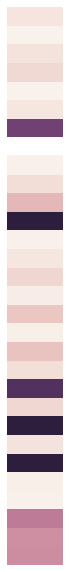

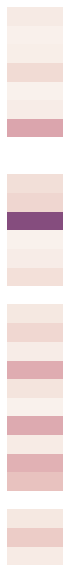

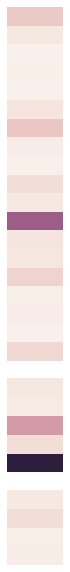

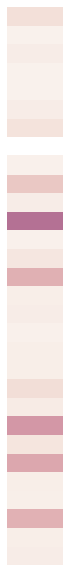

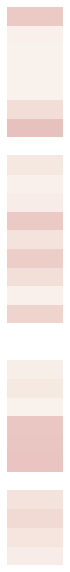

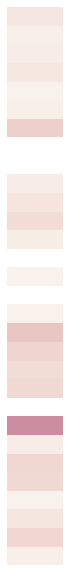

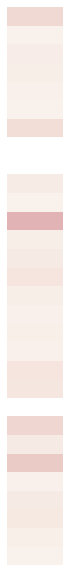

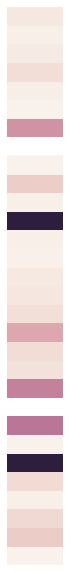

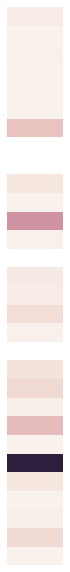

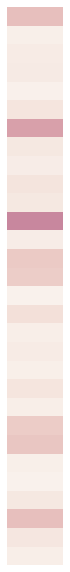

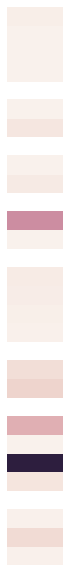

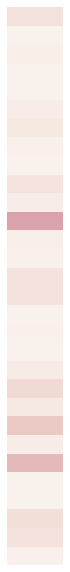

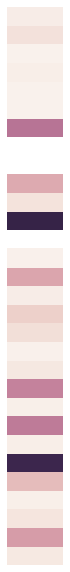

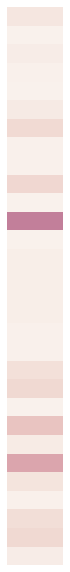

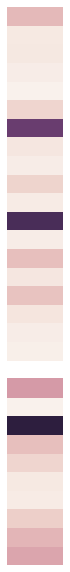

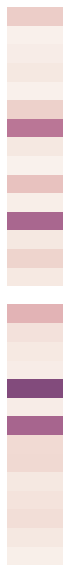

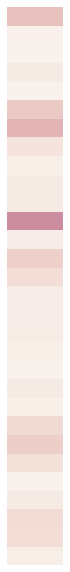

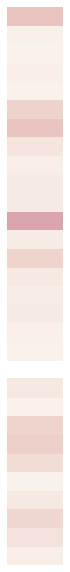

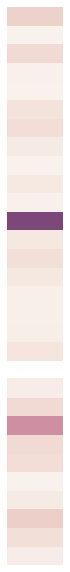

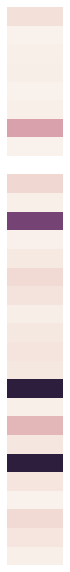

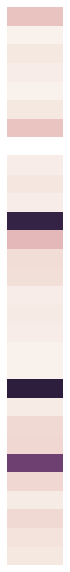

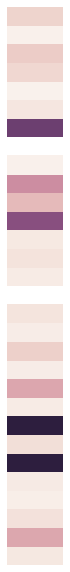

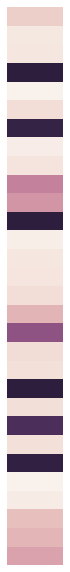

In [23]:
for alias in set(df2.ALIAS):
    sns.set(font_scale=2) 
    fish = df2[df2['ALIAS']==alias]
    plt.figure(figsize=(1,10))
    ax = heatmapper(fish, 'All repeats')
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.savefig('../figures/heatmaps/heatmap_%s.png' % fish.ALIAS.values[0], format='png', transparent = False)

They are made in the wrong orientation, moving them sideways using PIL with the 'image' program

In [24]:
from PIL import Image

In [25]:
for alias in set(df2.ALIAS):
    im = Image.open("../figures/heatmaps/heatmap_%s.png" % alias)
    im.rotate(90).save('../figures/heatmaps/heatmap_%s.png' % alias , "png")

# Function for adding heatmaps to the nodes of the phylogenetic tree.

In [29]:
# Need this list of species in the frame for making the tree
list_of_species = set(df2[df2['SPECIES']!='Salmo salar'].SPECIES)

First, get a list of names in figure

In [31]:
from ete3 import Tree, faces, TreeStyle, TextFace, NodeStyle, CircleFace

def make_a_cool_figure(tree, order, filename):
    # Importing full phylogeny (courtesy Micha and Martin)
    t = Tree(tree)

    # Deleting missing data that I do not have a RepeatLandscape for.

    fish_94 = t.search_nodes(name="fish_94")[0]
    fish_94.delete()
    fish_107 = t.search_nodes(name="fish_107")[0]
    fish_107.delete()

    # Include only this order:

    #exclude = set(fam_plot[fam_plot['ORDER']!=order].ALIAS)
    
    mylist = list_of_species
    
    exclude = set(df2[~df2['SPECIES'].isin(mylist)].ALIAS)
    
    # For every node label, get the names
    fish = []
    for node in t.traverse():
        if 'fish' in node.name:
            fish.append(node.name)

    # For every element not being the chosen order, and if it actually is in the phylogeny, delete the node.
    for element in exclude:
        if element in fish:
            delfish = t.search_nodes(name=element)[0]
            delfish.delete(preserve_branch_length = True)
            
            
    def mylayout(node): 
        if node.is_leaf():
            for i in fish:
                if node.search_nodes(name = i):
                    if i in set(df2.ALIAS):
                        faces.add_face_to_node(faces.TextFace('%s' \
                        % df2[df2['ALIAS']==i].SPECIES.unique()[0], 
                        fsize = 36,fstyle = 'italic'), node, column=0)

                        faces.add_face_to_node(faces.ImgFace('../figures/heatmaps/heatmap_%s.png' % i), 
                                               node, column=2, aligned = True)
 
    for n in t.traverse():
        nstyle = NodeStyle()
        nstyle["fgcolor"] = "White"
        nstyle["size"] = 0.1
        n.set_style(nstyle)
    
    # Coloring Acanthomorphata
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Polymixia japonica') |
                                           (df2['SPECIES']=='Gadus morhua')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Bisque'
    nstyle['bgcolor'] = 'Seashell'
    n.set_style(nstyle)

    # Coloring Gadiformes
    n = t.get_common_ancestor(set(df2[df2['ORDER']=='Gadiformes'].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'BlanchedAlmond'
    nstyle['bgcolor'] = 'WhiteSmoke'
    n.set_style(nstyle)
    
    
    # Coloring Acanthopterygii
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Monocentris japonica') |
                                           (df2['SPECIES']=='Xiphophorus maculatus')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Plum'
    nstyle['bgcolor'] = 'Ivory'
    n.set_style(nstyle)

    # Coloring Percomorphaceae
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Chatrabus melanurus') |
                                           (df2['SPECIES']=='Xiphophorus maculatus')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Thistle'
    nstyle['bgcolor'] = 'Snow'
    n.set_style(nstyle)
    
    # Coloring Lampridacea
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Regalecus glesne') |
                                           (df2['SPECIES']=='Lampris guttauts')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Khaki'
    nstyle['bgcolor'] = 'Snow'
    n.set_style(nstyle)
    
    # Coloring the rest
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Benthosema glaciale') |
                                           (df2['SPECIES']=='Danio rerio')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'LavenderBlush'
    
    nstyle['bgcolor'] = 'Linen'

    n.set_style(nstyle)
    
    # Display the tree
    ts = TreeStyle()
    ts.complete_branch_lines_when_necessary = True
    ts.show_leaf_name = False
    ts.show_branch_length = False
    ts.show_scale = False
    ts.layout_fn = mylayout
    ts.scale = None
    #ts.mode = 'c'
    ts.tree_width = 500

    
    t.render(filename, tree_style = ts)
    return "Done"

In [32]:
# Parameters: .tre-file, title (not shown) in figure, filename"
make_a_cool_figure('../phylogeny/final_tree.tre', 'Heatmap_top30_families_scale1'\
                   , '../figures/%s_tree.pdf' % '3.may_test_Heatmap_top30_families_scale1') 

'Done'

# Barplot-tree

In [50]:
classes = pd.read_csv("../ipython_data/class.tab", sep = "\t", index_col = False,
                      names = ["ALIAS","CLASS", "MASKED_BP", "DOUBLE_BP_CLASS",
                               "DOUBLE_BP_CLASS_FAMILY", "MASKED_PERC", "DOUBLE_PERC_CLASS",
                               "DOUBLE_PERC_CLASS_FAMILY"])
classes = pd.merge(annot, classes)

# I only care about DNA transposons, LTR retrotransposons, LINEs and SINEs.
classes = classes[(classes['CLASS']=='DNA') | (classes['CLASS']=='LTR')\
                  | (classes['CLASS']=='LINE') | (classes['CLASS']=='SINE')]
classes = pd.merge(alias74, classes)

In [51]:
classes.head()

,ALIAS,ORDER,SPECIES,COMMON_NAME,CLASS,MASKED_BP,DOUBLE_BP_CLASS,DOUBLE_BP_CLASS_FAMILY,MASKED_PERC,DOUBLE_PERC_CLASS,DOUBLE_PERC_CLASS_FAMILY
0,fish_123,Characiformes,Astyanax mexicanus,Blind cave fish,DNA,178965922,7193060,3525154,15.023466,0.603828,0.295922
1,fish_123,Characiformes,Astyanax mexicanus,Blind cave fish,LINE,11166062,175996,97731,0.937346,0.014774,0.008204
2,fish_123,Characiformes,Astyanax mexicanus,Blind cave fish,LTR,8384981,140659,79026,0.703885,0.011808,0.006634
3,fish_123,Characiformes,Astyanax mexicanus,Blind cave fish,SINE,1420579,48681,25932,0.119252,0.004087,0.002177
4,fish_109,Cypriniformes,Danio rerio,Zebrafish,DNA,555643193,29532202,8086692,39.336925,2.090741,0.572500


I want the relative fraction of all DNA transposons and retrotransposons for each fish

In [52]:
for SPECIES in set(classes.SPECIES):
    frame = classes[classes['SPECIES']==SPECIES]
    frame['TOTAL'] = frame.MASKED_PERC.sum()
    frame['PERC'] = frame.MASKED_PERC / frame.TOTAL
    frame = frame.pivot('ALIAS', 'CLASS', 'PERC').reset_index()
    
    print SPECIES, '\t', 'DNA  \t %s' % classes[(classes['SPECIES']==SPECIES) & (classes['CLASS']=='DNA')].MASKED_PERC.values[0], "\t", frame.DNA.values[0] 
    print SPECIES, '\t','LTR  \t %s' % classes[(classes['SPECIES']==SPECIES) & (classes['CLASS']=='LTR')].MASKED_PERC.values[0], "\t", frame.LTR.values[0]
    print SPECIES, '\t','LINE \t %s' % classes[(classes['SPECIES']==SPECIES) & (classes['CLASS']=='LINE')].MASKED_PERC.values[0], "\t", frame.LINE.values[0]
    print SPECIES, '\t','SINE \t %s' % classes[(classes['SPECIES']==SPECIES) & (classes['CLASS']=='SINE')].MASKED_PERC.values[0], "\t", frame.SINE.values[0]

/Users/williambrynildsen/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/williambrynildsen/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Stylephorus chordatus 	DNA  	 8.9656997452 	0.466568358289
Stylephorus chordatus 	LTR  	 3.22746291716 	0.167954774027
Stylephorus chordatus 	LINE 	 6.45279313353 	0.335798563887
Stylephorus chordatus 	SINE 	 0.57030605712 	0.0296783037972
Selene dorsalis 	DNA  	 3.98308382261 	0.638646682318
Selene dorsalis 	LTR  	 0.645858791079 	0.103556840011
Selene dorsalis 	LINE 	 1.29458782194 	0.207573893564
Selene dorsalis 	SINE 	 0.313226025952 	0.0502225841078
Chromis chromis 	DNA  	 11.6245137407 	0.680245042429
Chromis chromis 	LTR  	 0.801370333202 	0.046894709617
Chromis chromis 	LINE 	 3.19957219925 	0.187233046902
Chromis chromis 	SINE 	 1.46325884517 	0.0856272010524
Rondeletia loricata 	DNA  	 7.8602700558 	0.599741189933
Rondeletia loricata 	LTR  	 1.27224461485 	0.0970726824625
Rondeletia loricata 	LINE 	 3.24214383662 	0.247376640842
Rondeletia loricata 	SINE 	 0.731444904893 	0.0558094867628
Arctogadus glacialis 	DNA  	 8.13965151753 	0.610534179417
Arctogadus glacialis 	LTR  	 2

The information above was pasted into a text editor and saved as a table

In [56]:
table = pd.read_table('../tables/supplementary_table_classified_fractions.txt',
              header = None, names = ['SPECIES', 'CLASS', 'PERC', 'FRACTION'])

In [59]:
table.head(10)

,SPECIES,CLASS,PERC,FRACTION
0,Stylephorus chordatus,DNA,8.965700,0.466568
1,Stylephorus chordatus,LTR,3.227463,0.167955
2,Stylephorus chordatus,LINE,6.452793,0.335799
3,Stylephorus chordatus,SINE,0.570306,0.029678
4,Selene dorsalis,DNA,3.983084,0.638647
5,Selene dorsalis,LTR,0.645859,0.103557
6,Selene dorsalis,LINE,1.294588,0.207574
7,Selene dorsalis,SINE,0.313226,0.050223
8,Chromis chromis,DNA,11.624514,0.680245
9,Chromis chromis,LTR,0.801370,0.046895


In [57]:
len(set(table.SPECIES))

74

/Users/williambrynildsen/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/williambrynildsen/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


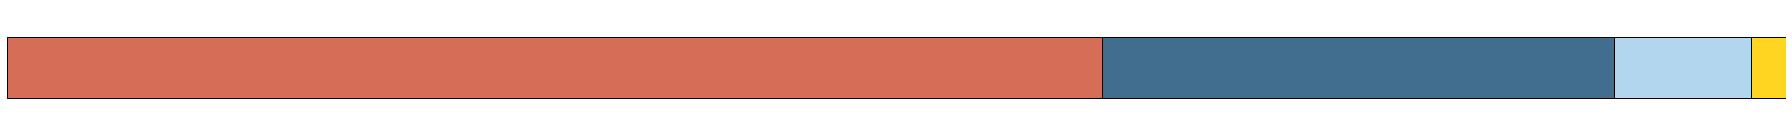

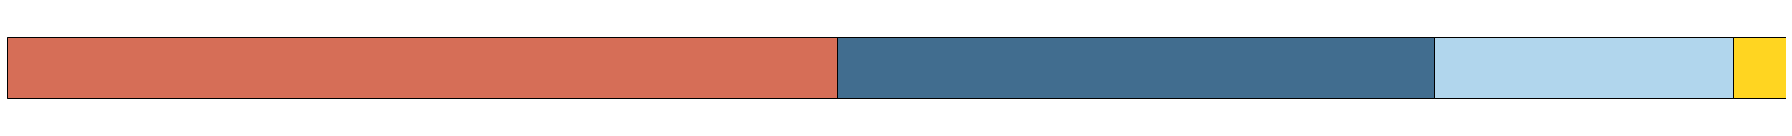

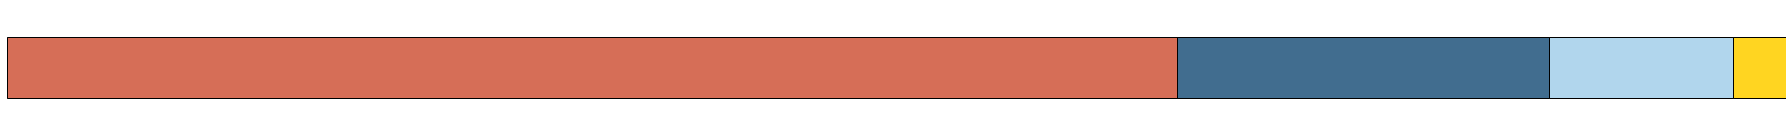

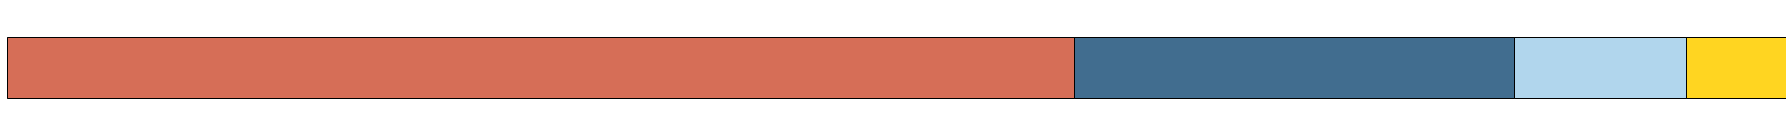

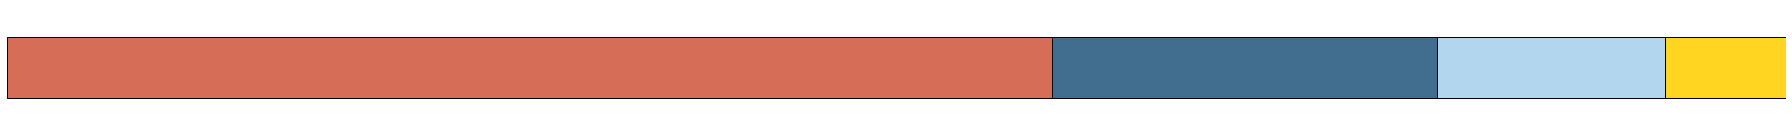

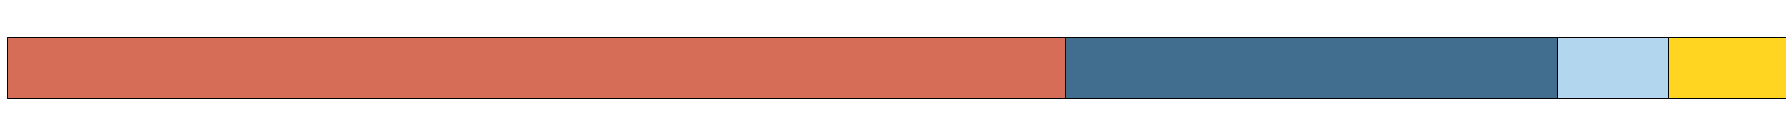

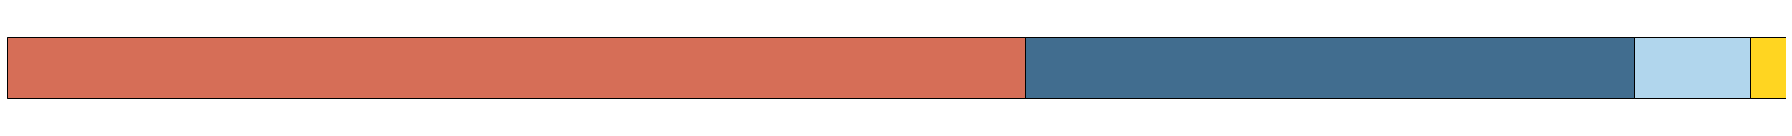

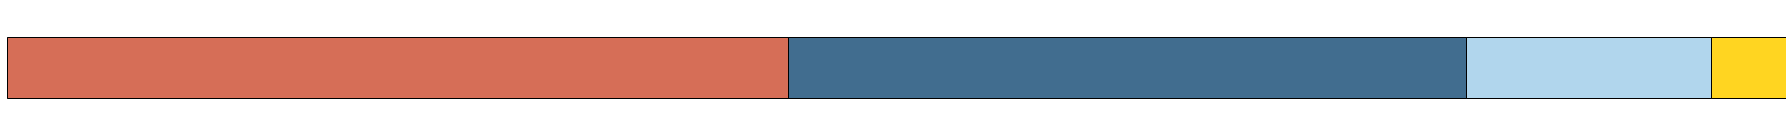

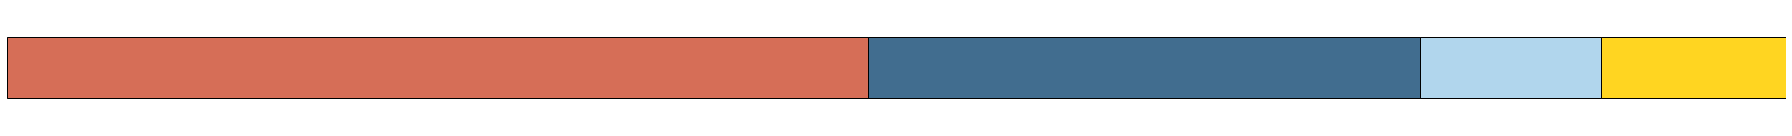

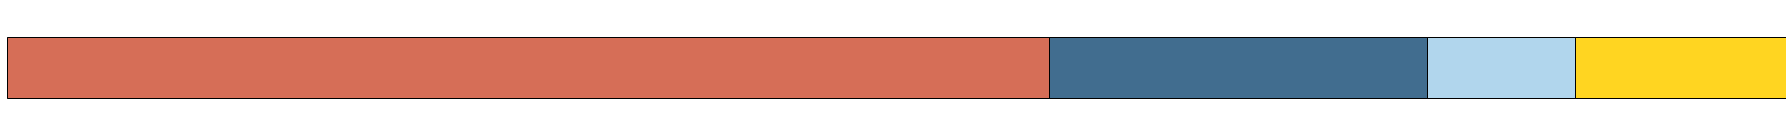

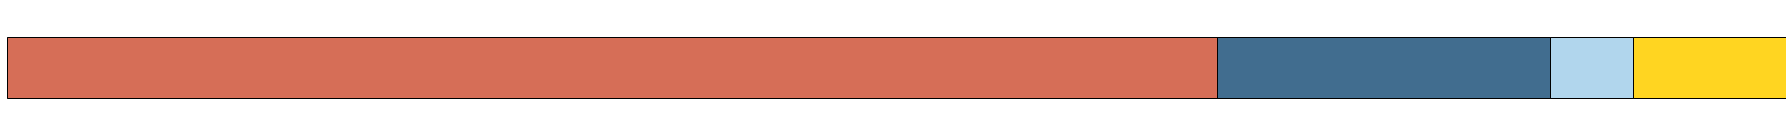

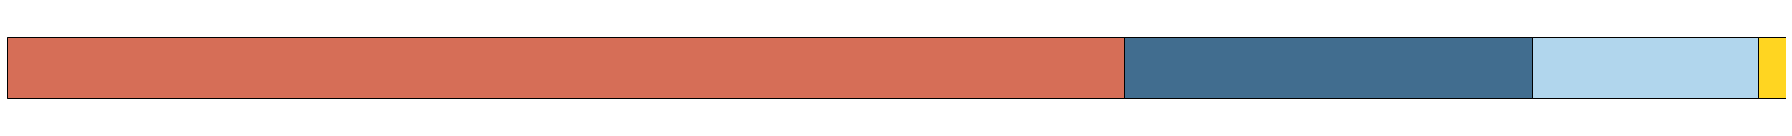

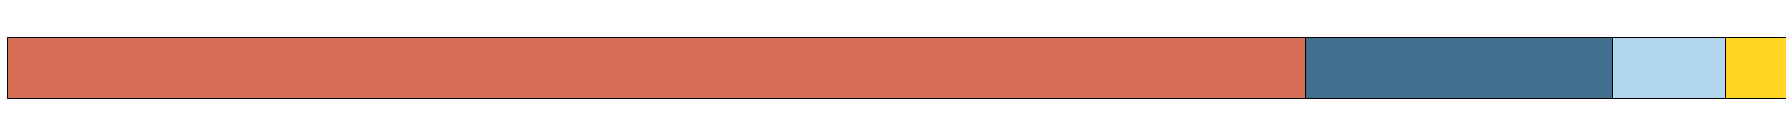

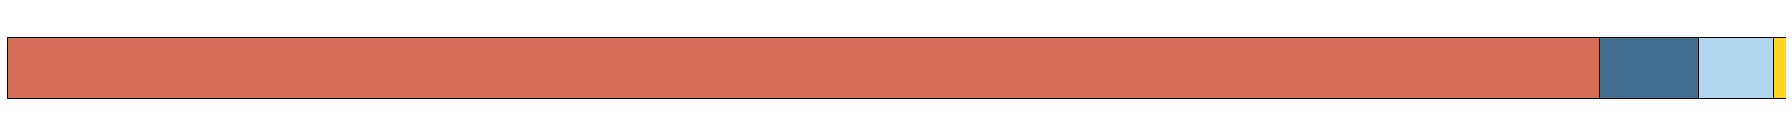

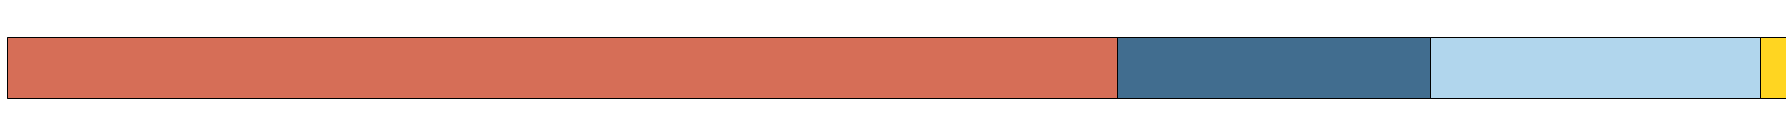

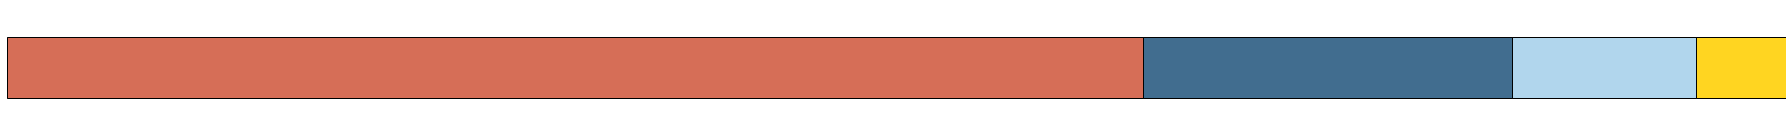

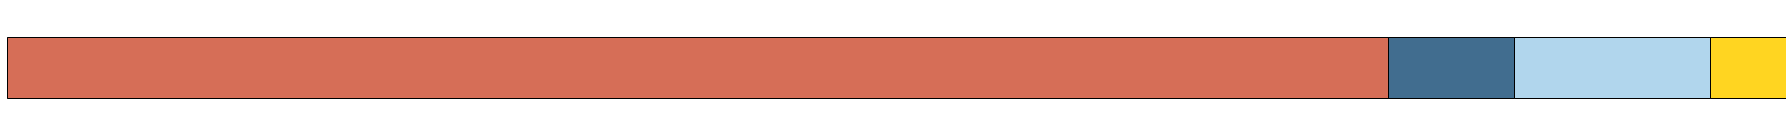

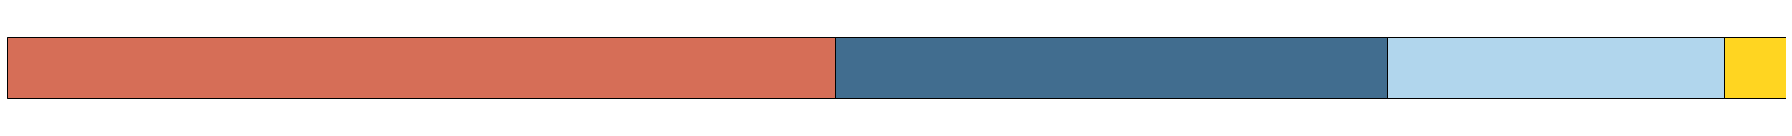

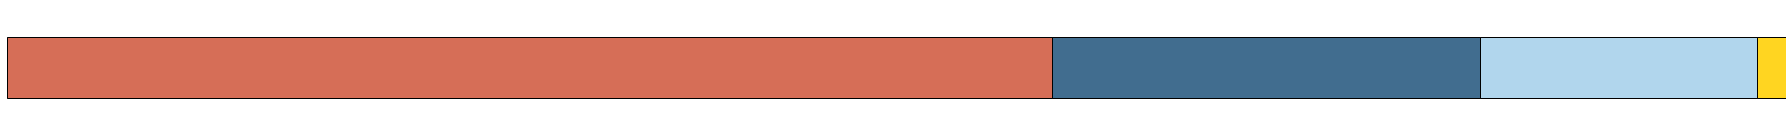

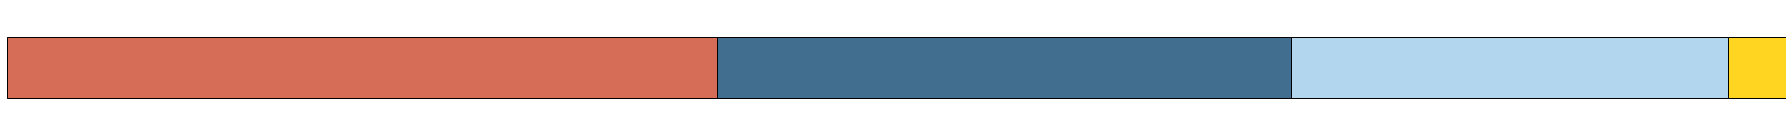

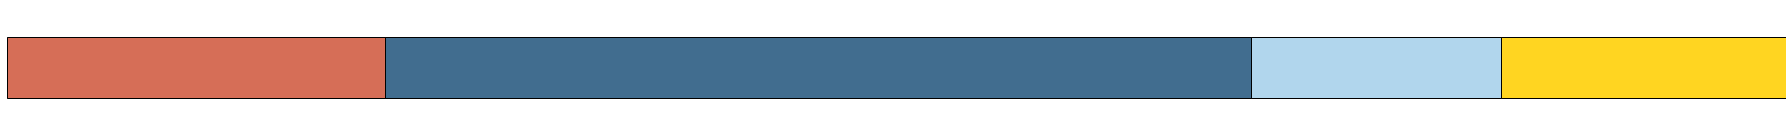

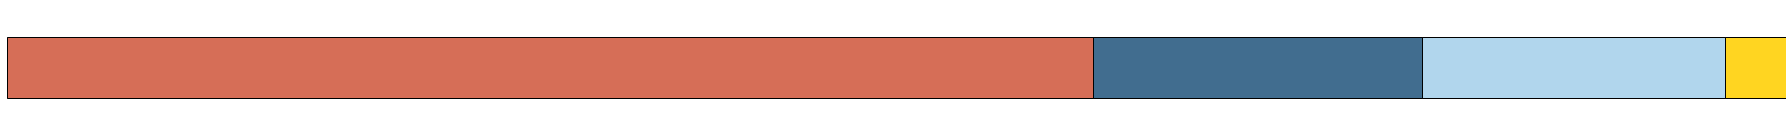

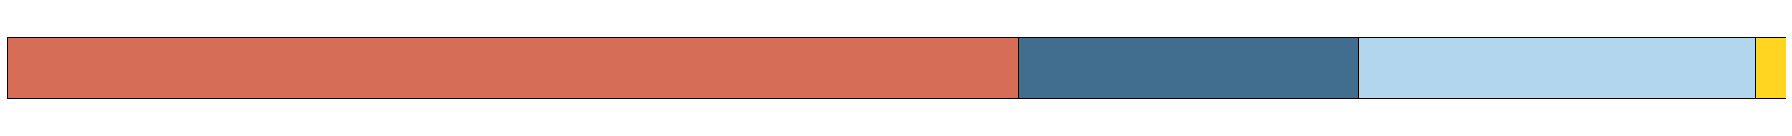

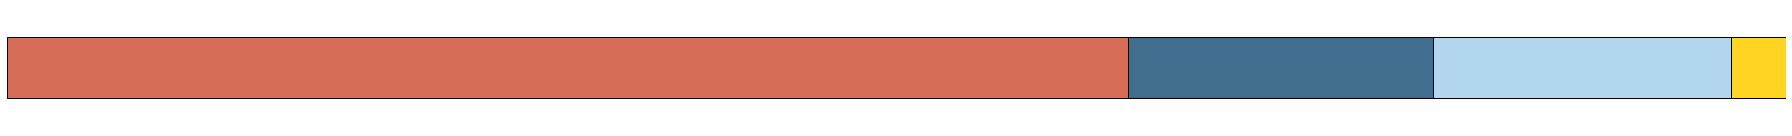

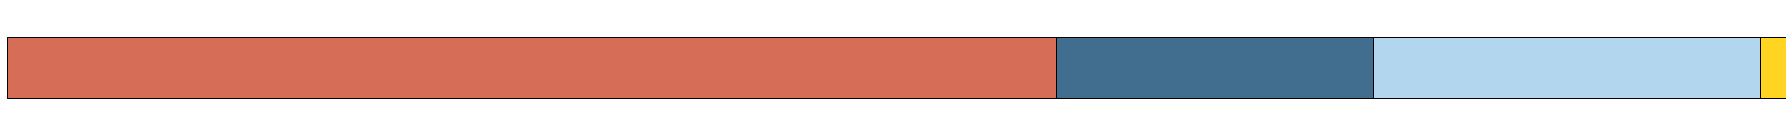

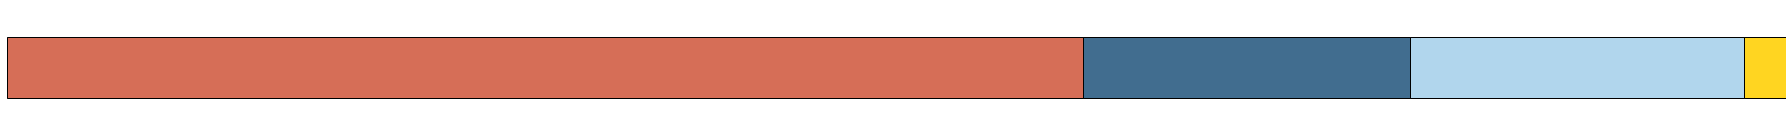

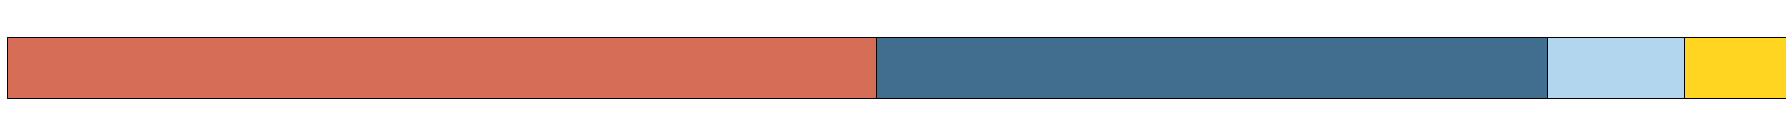

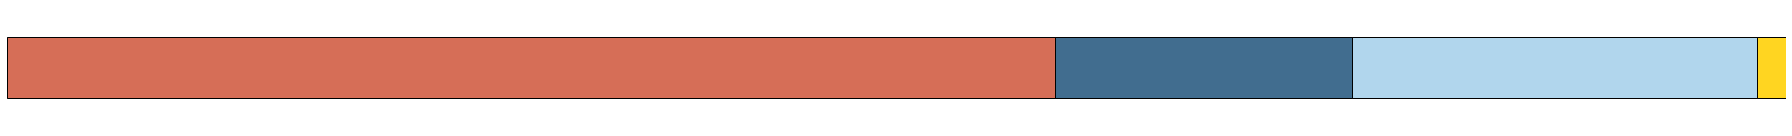

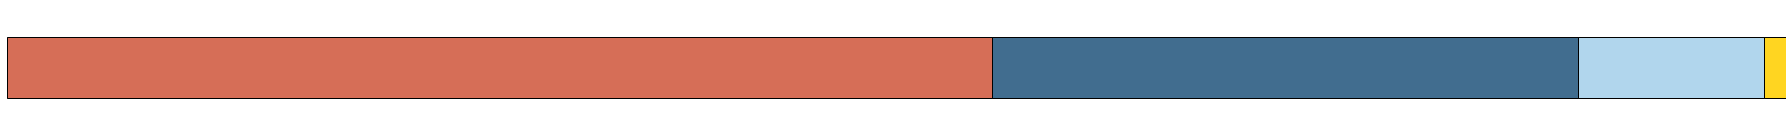

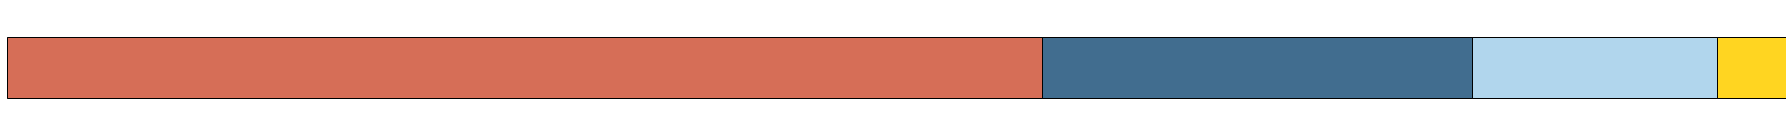

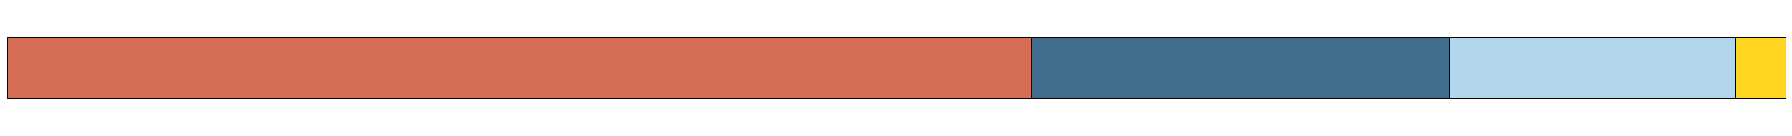

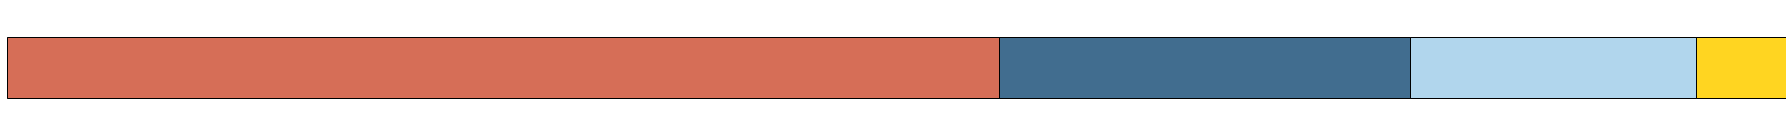

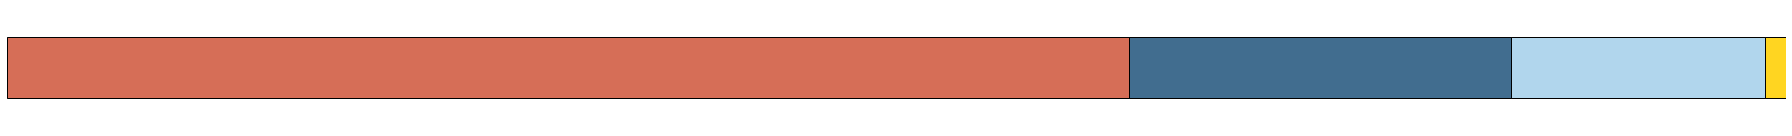

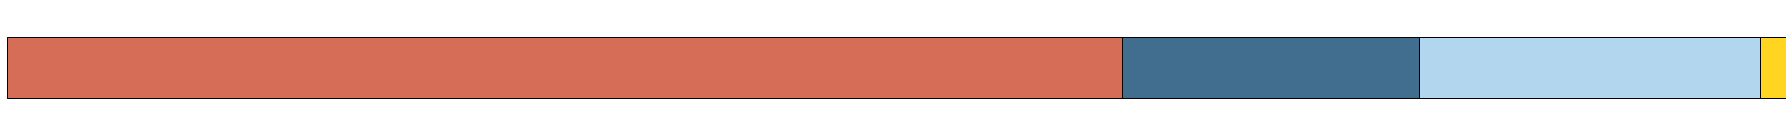

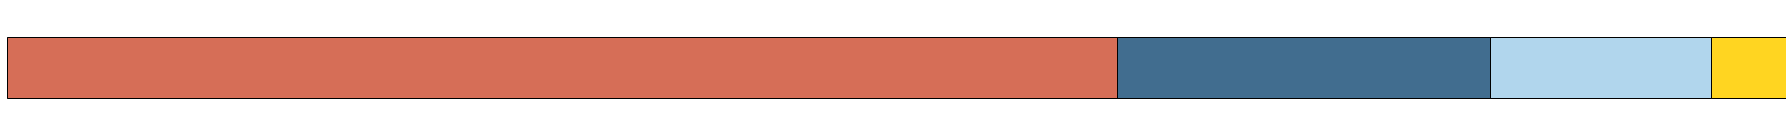

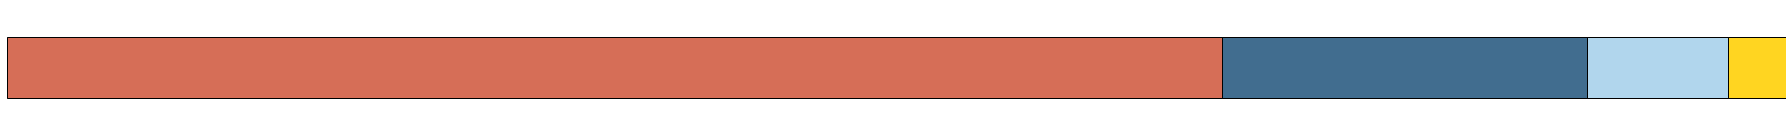

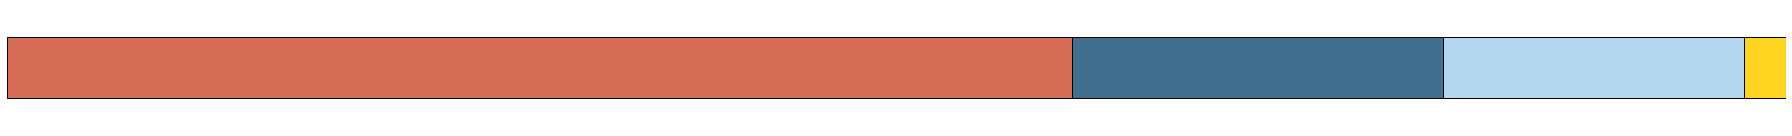

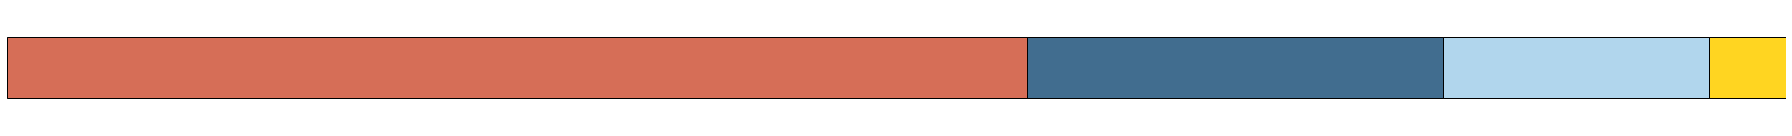

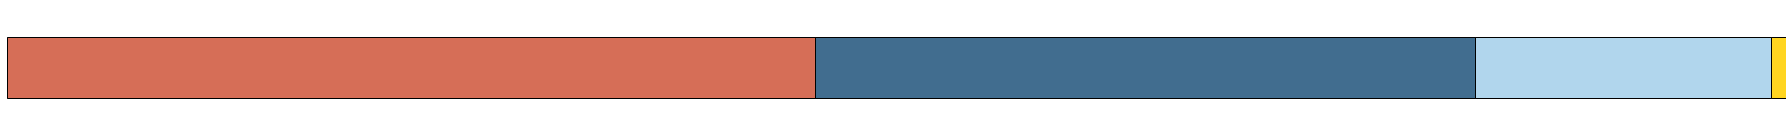

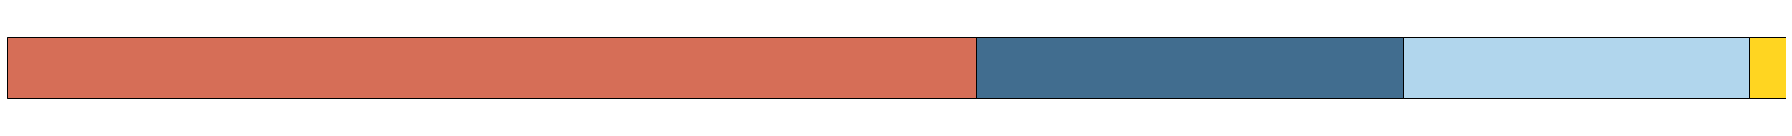

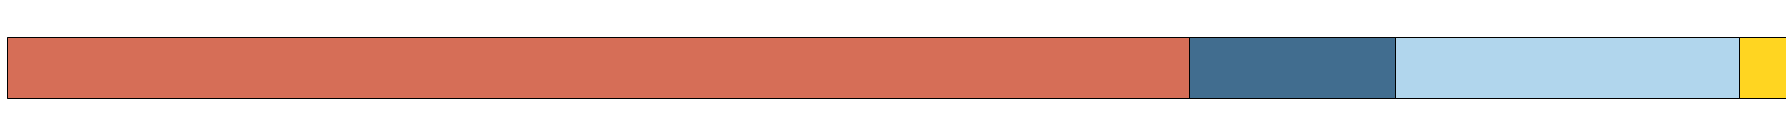

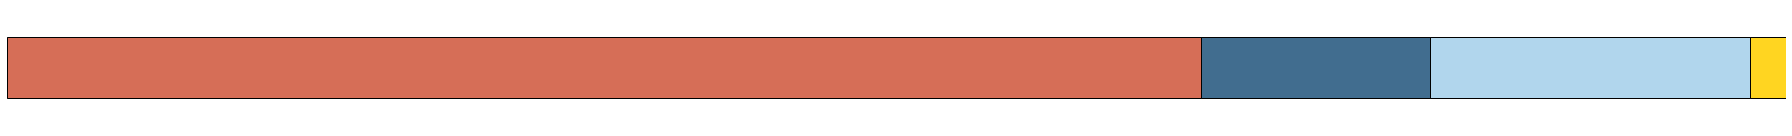

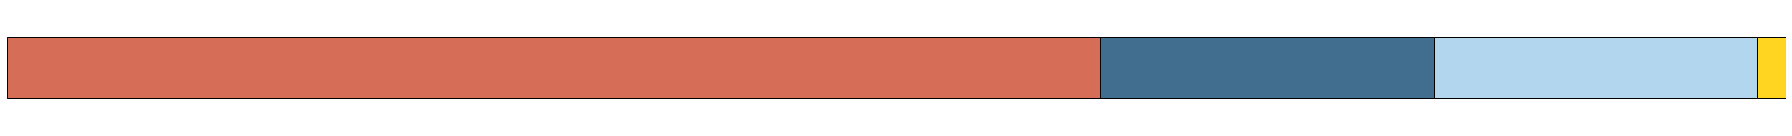

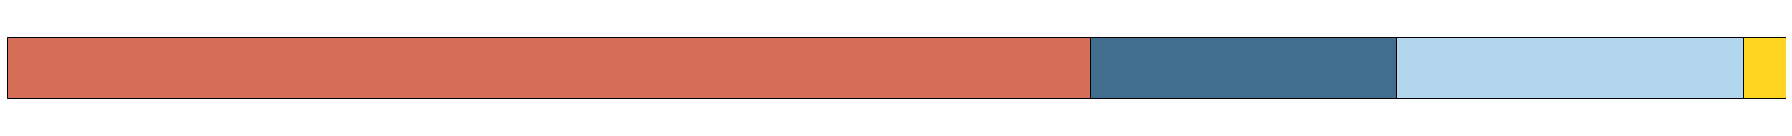

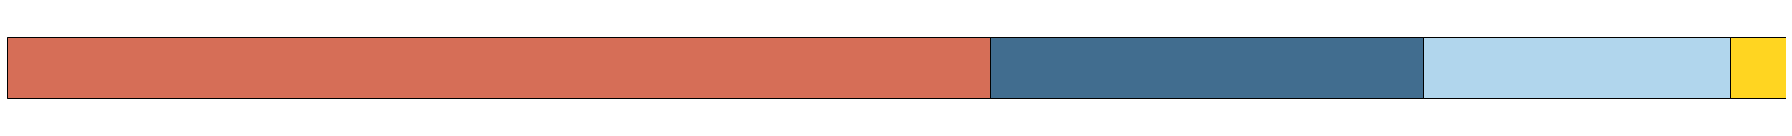

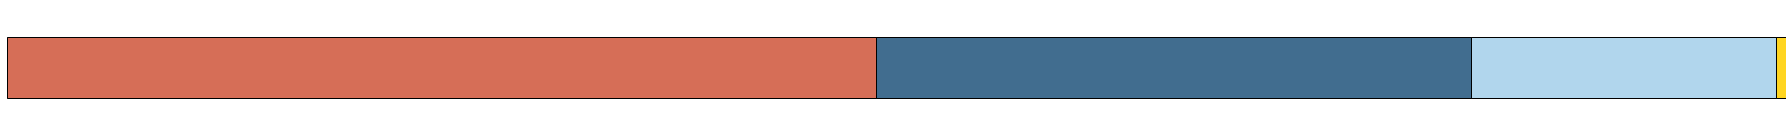

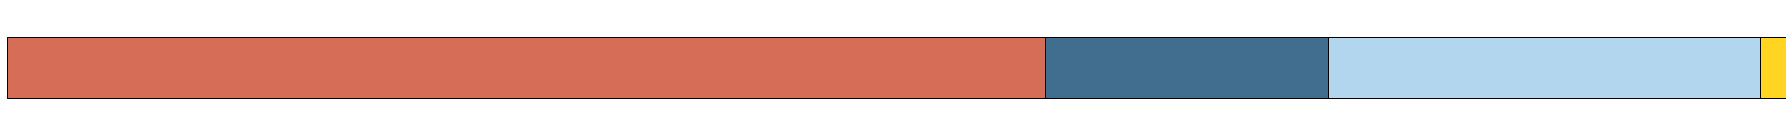

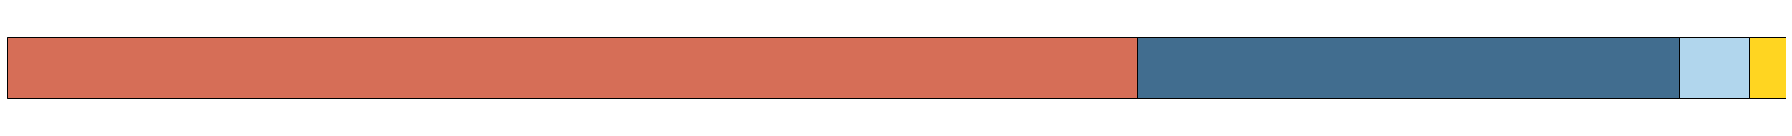

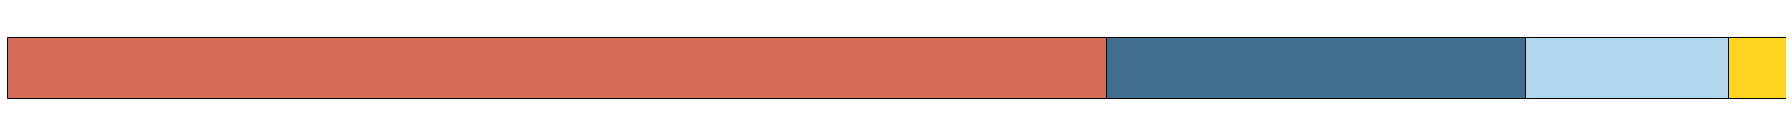

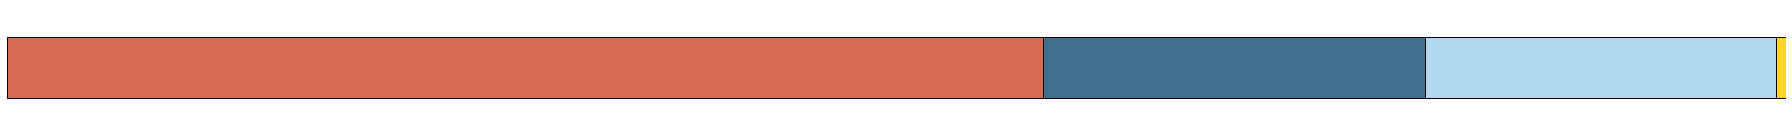

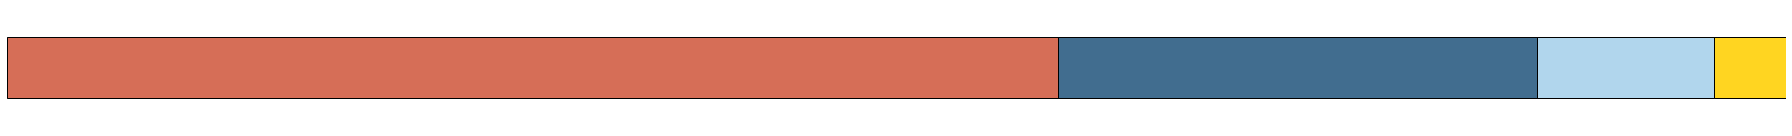

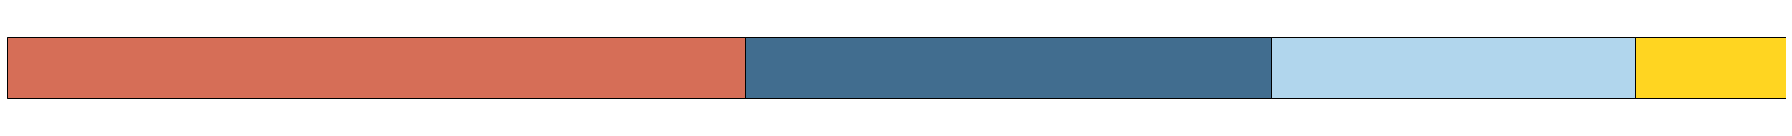

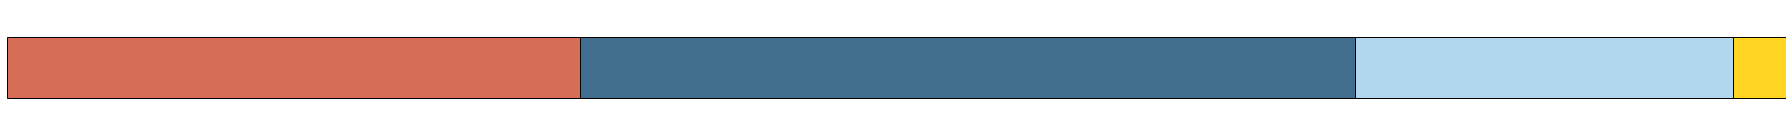

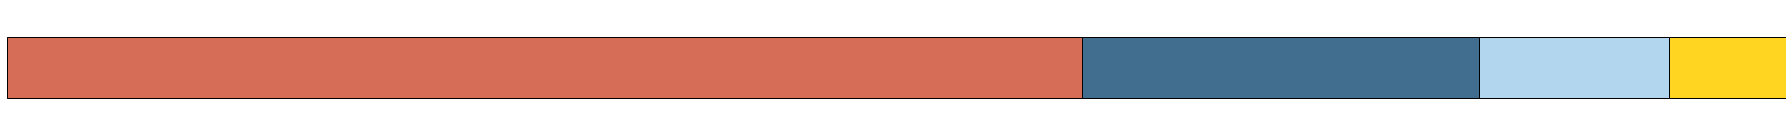

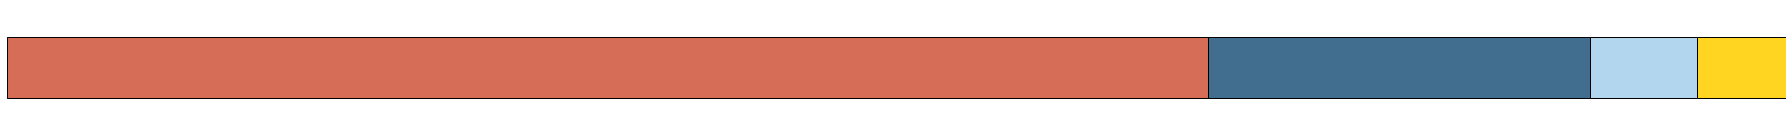

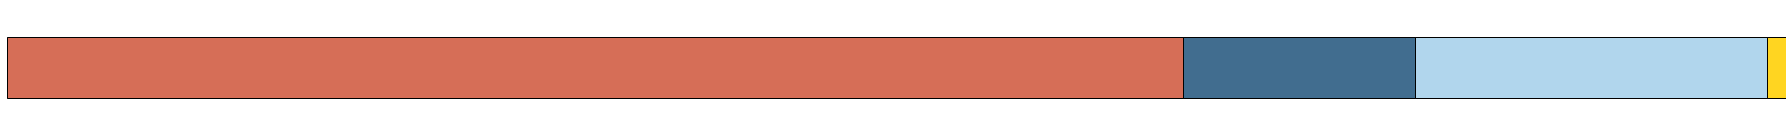

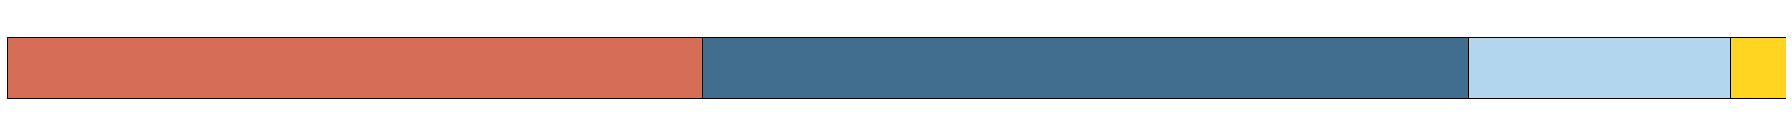

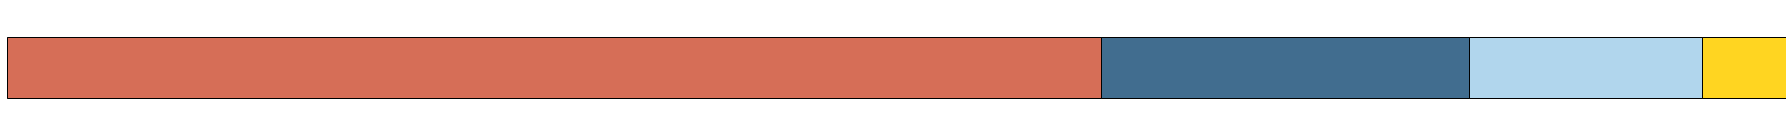

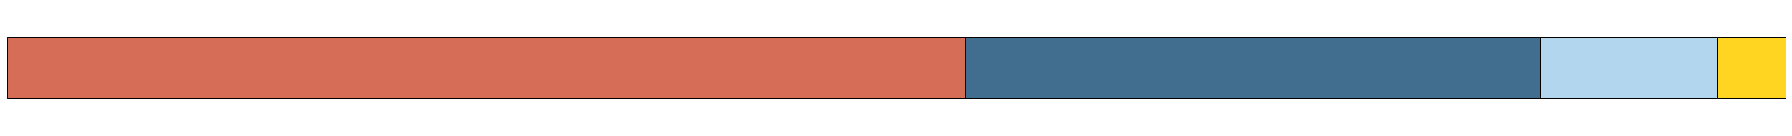

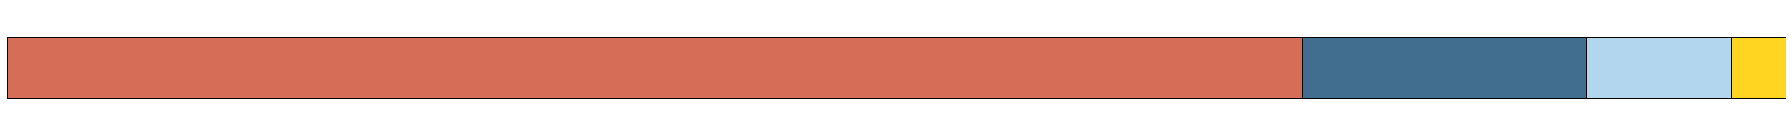

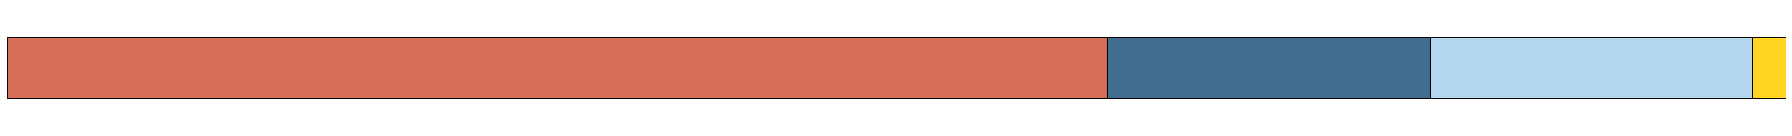

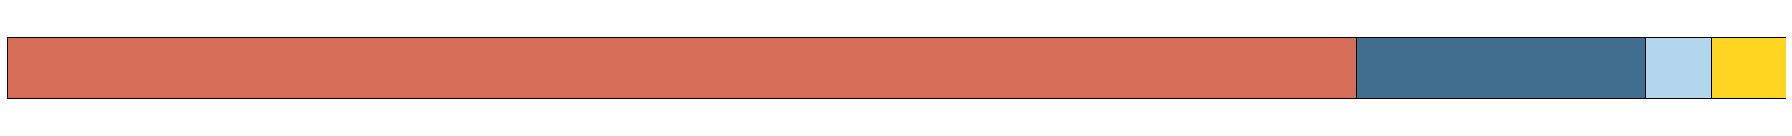

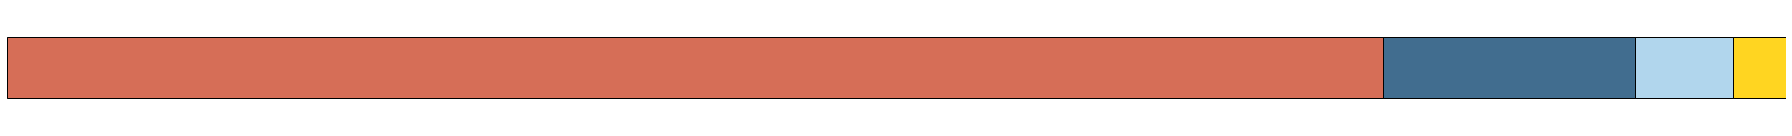

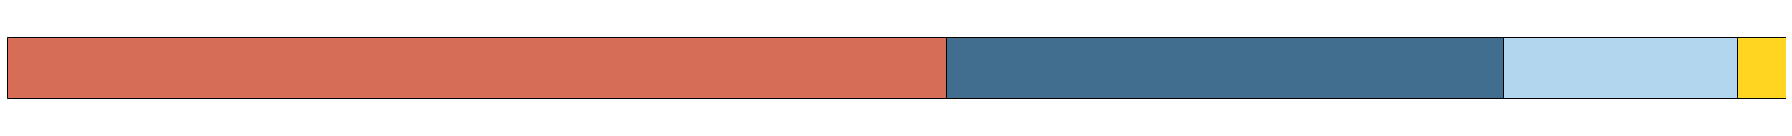

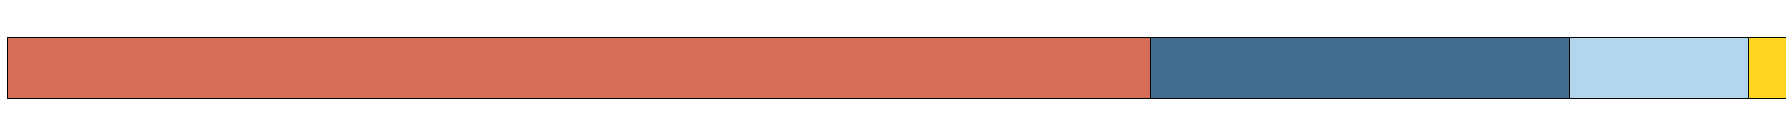

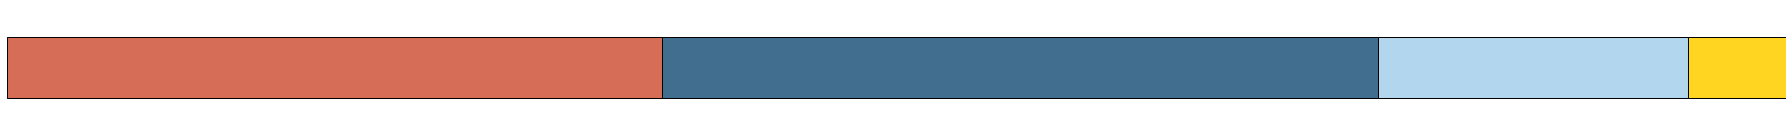

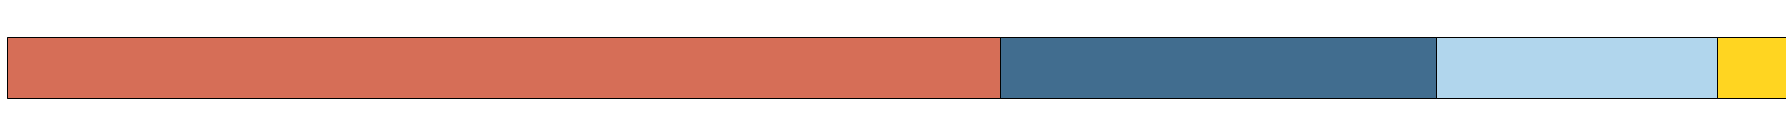

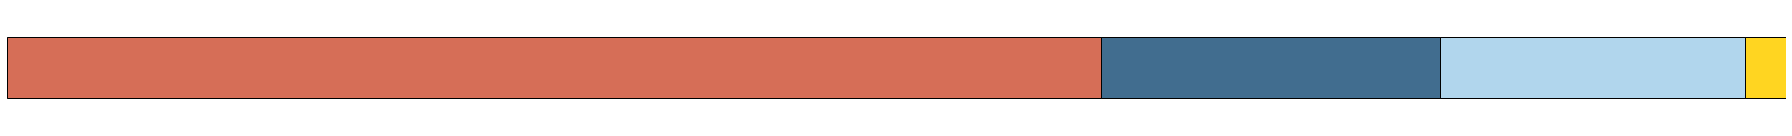

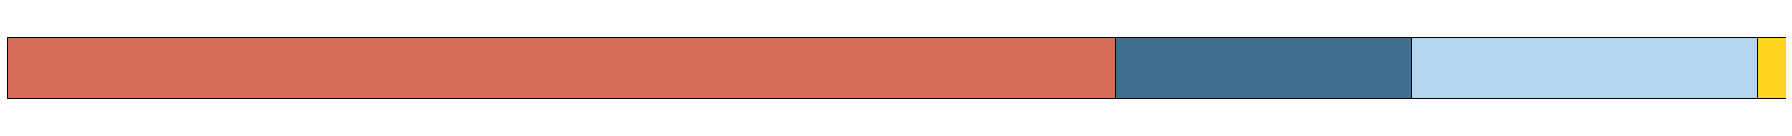

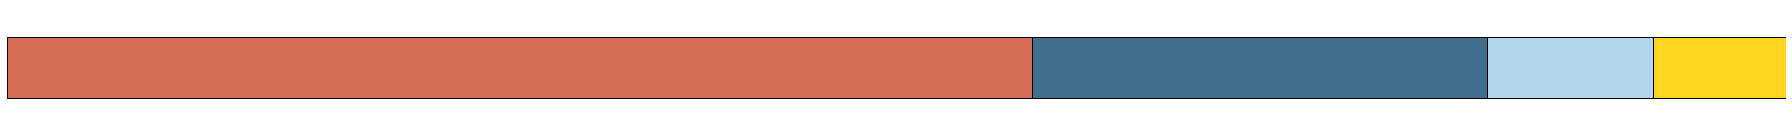

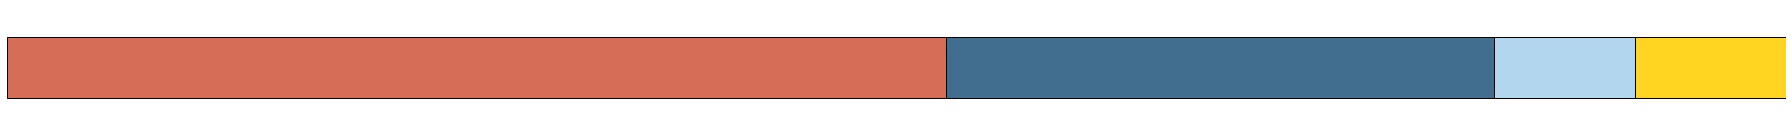

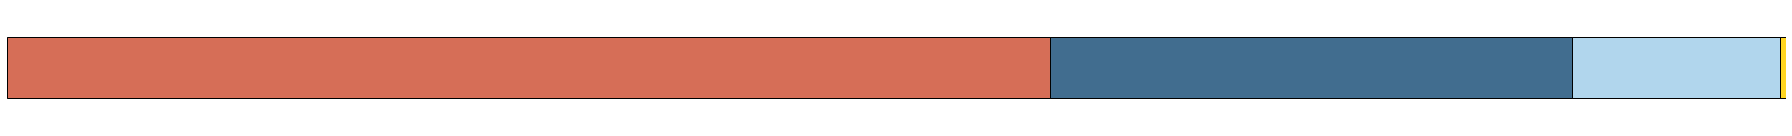

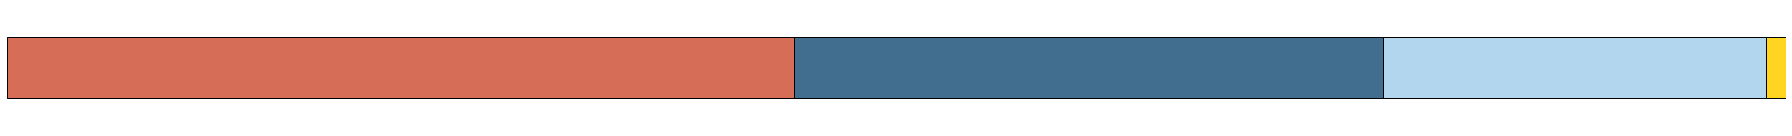

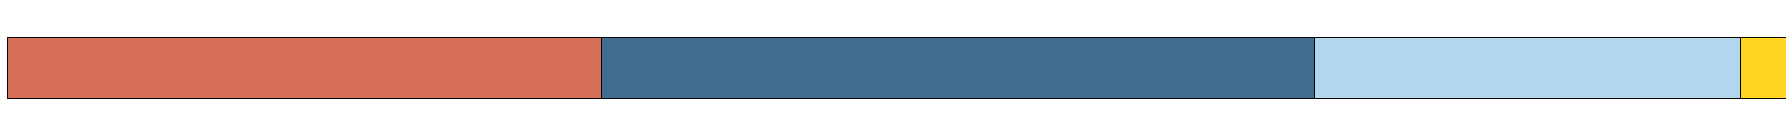

In [61]:
for alias in set(classes.ALIAS):   # replace ['fish_97'] with set(classes.ALIAS) for one bar per fish
    frame = classes[classes['ALIAS']==alias]
    frame['TOTAL'] = frame.MASKED_PERC.sum()
    frame['PERC'] = frame.MASKED_PERC / frame.TOTAL
    frame = frame.pivot('ALIAS', 'CLASS', 'PERC').reset_index()

    figure = frame.plot(kind = 'barh', stacked = True, linewidth = 1, xlim = [0,1],
                        figsize = (25,2), grid = None, style = None, legend = None,
               colors = ['#d66e57', '#416d8f', '#b1d6ed', '#ffd521']).set_axis_bgcolor('white')

    ax = plt.axes()
    ax.set_yticks([])
    ax.set_xticks([])
    ax.tick_params(axis='x', colors=None)
    plt.tight_layout()
    plt.savefig('../figures/barplots/barplot_%s.png' % alias, type = 'png', transparent = True)

# Making the figure with barplots on each node

In [65]:
from ete3 import Tree, faces, TreeStyle, TextFace, NodeStyle, CircleFace

def make_a_cool_figure(tree, order, filename):
    # Importing full phylogeny (courtesy Micha and Martin)
    t = Tree(tree)

    # Deleting missing data that I do not have a RepeatLandscape for.
    

    fish_94 = t.search_nodes(name="fish_94")[0]
    fish_94.delete()
    fish_107 = t.search_nodes(name="fish_107")[0]
    fish_107.delete()

    # Remove fish that produce barcharts of the wrong size
    
    # For every node label, get the names
    fish = []
    for node in t.traverse():
        if 'fish' in node.name:
            fish.append(node.name)
    

    # Create the layout
    def mylayout(node): 
        if node.is_leaf():
            for i in fish:
                if node.search_nodes(name = i):
                    if i in set(df2.ALIAS):
                        faces.add_face_to_node(faces.TextFace('%s' % df2[df2['ALIAS']==i].SPECIES.unique()[0], fsize = 96), 
                                           node, column=0)

    # ADDING STACKED BARS                
                        faces.add_face_to_node(faces.ImgFace('../figures/barplots/barplot_%s.png' % i), 
                                               node, column=2, aligned = True)                  

    for n in t.traverse():
        nstyle = NodeStyle()
        nstyle["fgcolor"] = "White"
        nstyle["size"] = 0.1
        n.set_style(nstyle)
    
    # Coloring Acanthomorphata
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Polymixia japonica') |
                                           (df2['SPECIES']=='Gadus morhua')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Bisque'
    nstyle['bgcolor'] = 'Seashell'
    n.set_style(nstyle)

    # Coloring Gadiformes
    n = t.get_common_ancestor(set(df2[df2['ORDER']=='Gadiformes'].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'BlanchedAlmond'
    nstyle['bgcolor'] = 'WhiteSmoke'
    n.set_style(nstyle)
    
    
    # Coloring Acanthopterygii
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Monocentris japonica') |
                                           (df2['SPECIES']=='Xiphophorus maculatus')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Plum'
    nstyle['bgcolor'] = 'Ivory'
    n.set_style(nstyle)

    # Coloring Percomorphaceae
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Chatrabus melanurus') |
                                           (df2['SPECIES']=='Xiphophorus maculatus')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Thistle'
    nstyle['bgcolor'] = 'Snow'
    n.set_style(nstyle)
    
    # Coloring Lampridacea
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Regalecus glesne') |
                                           (df2['SPECIES']=='Lampris guttauts')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'Khaki'
    nstyle['bgcolor'] = 'Snow'
    n.set_style(nstyle)
    
    # Coloring the rest
    n = t.get_common_ancestor(set(df2[(df2['SPECIES']=='Benthosema glaciale') |
                                           (df2['SPECIES']=='Danio rerio')].ALIAS))
    nstyle = NodeStyle()
    #nstyle['bgcolor'] = 'LavenderBlush'
    
    nstyle['bgcolor'] = 'Linen'

    n.set_style(nstyle)
    
    # Display the tree
    ts = TreeStyle()
    #ts.complete_branch_lines_when_necessary = True
    ts.show_leaf_name = False
    ts.show_branch_length = False
    ts.show_scale = False
    ts.layout_fn = mylayout
    #ts.mode = 'c'
    ts.arc_start = 180 # 0 degrees = 3 o'clock
    ts.arc_span =  -180
    #ts.scale = None
    ts.tree_width = 2000
    #ts.title.add_face(TextFace("%s" % order, fsize=76), column = 0)
    
    
    t.render(filename, tree_style = ts)
    return "Done"

make_a_cool_figure('../phylogeny/final_tree.tre', '', '../figures/%s_tree.pdf' % '3.may_test_barplot')

'Done'